<a href="https://colab.research.google.com/github/K7S3/ML4NS-Project/blob/main/BNN_Hydration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("SAMPL.csv")
data.head()

,iupac,smiles,expt,calc
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917


In [ ]:
data.size

2568

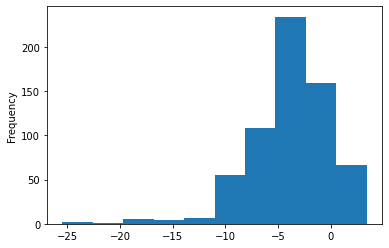

In [ ]:
data['expt'].plot.hist()

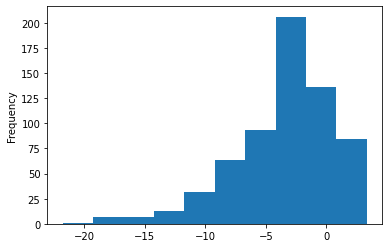

In [ ]:
data['calc'].plot.hist()

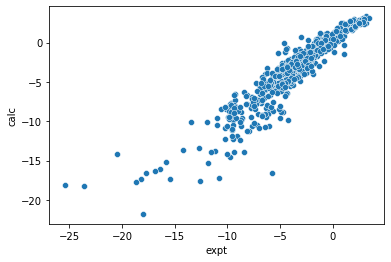

In [ ]:
sns.scatterplot(x='expt', y='calc', data=data)

In [ ]:
data['expt'].mean()

-3.8030062305295944

In [ ]:
data['calc'].mean()

-3.4862227414330222

In [ ]:
!pip3 install git+https://github.com/samoturk/mol2vec

  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-m9eyt2d0
  Running command git clone -q https://github.com/samoturk/mol2vec /tmp/pip-req-build-m9eyt2d0
  Created wheel for mol2vec: filename=mol2vec-0.1-cp37-none-any.whl size=14028 sha256=e629105c4845db36a453b1381b69c896c79e1efe1869637d953a6b49cd7d483e
  Stored in directory: /tmp/pip-ephem-wheel-cache-pv8os7m5/wheels/96/0f/2d/a1092b9677c96453dc244b209544cac61bc8b974cbffb50063
Successfully built mol2vec


In [ ]:
!curl -L bit.ly/rdkit-colab | tar xz -C /

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   163  100   163    0     0   1189      0 --:--:-- --:--:-- --:--:--  1189
100   133  100   133    0     0    446      0 --:--:-- --:--:-- --:--:--   446
100   620  100   620    0     0   1294      0 --:--:-- --:--:-- --:--:--  1294
100 29.6M  100 29.6M    0     0  7194k      0  0:00:04  0:00:04 --:--:-- 9151k


In [ ]:
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg

In [ ]:
from rdkit import Chem

In [ ]:
aas = [Chem.MolFromSmiles(x) for x in data['smiles']]

In [ ]:
sentence = mol2alt_sentence(aas[0], 1)
sentence

['2246728737',
 '3818546315',
 '848128881',
 '994637429',
 '2246728737',
 '3818546315',
 '2246699815',
 '1738265797',
 '864942730',
 '1510328189',
 '3217380708',
 '2994748777',
 '3218693969',
 '951226070',
 '3218693969',
 '951226070',
 '3217380708',
 '3162837314',
 '3218693969',
 '951226070',
 '3218693969',
 '951226070',
 '864674487',
 '2076190208',
 '2246728737',
 '3975275337']

In [ ]:
from gensim.models import word2vec

In [ ]:
!wget https://github.com/samoturk/mol2vec/raw/master/examples/models/model_300dim.pkl

--2021-04-30 17:52:27--  https://github.com/samoturk/mol2vec/raw/master/examples/models/model_300dim.pkl
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/samoturk/mol2vec/master/examples/models/model_300dim.pkl [following]
--2021-04-30 17:52:27--  https://raw.githubusercontent.com/samoturk/mol2vec/master/examples/models/model_300dim.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76786055 (73M) [application/octet-stream]
Saving to: ‘model_300dim.pkl’

model_300dim.pkl    100%[===================>]  73.23M   146MB/s    in 0.5s    

2021-04-30 17:52:31 (146 MB/s) - ‘model_300dim.pkl’ saved [767

In [ ]:
model = word2vec.Word2Vec.load('model_300dim.pkl')

In [ ]:
len(model.wv.vocab.keys())

21003

In [ ]:
aa_sentences = [mol2alt_sentence(x, 1) for x in aas]

In [ ]:
df_vec = pd.DataFrame()

In [ ]:
df_vec['mol2vec'] = [DfVec(x) for x in sentences2vec(aa_sentences, model, unseen='UNK')]
df_vec['expt'] = data['expt']
df_vec['calc'] = data['calc']

In [ ]:
X = np.array([x.vec for x in df_vec['mol2vec']])
y = np.array(df_vec['expt'])
calc_y = np.array(df_vec['calc'])

In [ ]:
print(X.shape)

(642, 300)


In [ ]:
from sklearn.model_selection import train_test_split
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [ ]:
# !pip install -q tensorflow_probability
# !pip install -q tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
from tensorflow_probability.python.math import random_rademacher
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, ReLU, Dropout
from tensorflow.keras.optimizers import Adam

# from catboost import CatBoostRegressor

# from google.cloud import bigquery

In [ ]:
# Settings
sns.set()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
%config InlineBackend.figure_format = 'svg'
np.random.seed(12345)
tf.random.set_seed(12345)

In [ ]:
mse_scorer = make_scorer(mean_squared_error)

# Function to print cross-validated mean abs deviation
def cv_mse(regressor, x_in, y_in, cv=3, scorer=mse_scorer):
    scores = cross_val_score(regressor, x_in, y_in, cv=cv, scoring=scorer)
    print('MSE:', scores.mean())


mae_scorer = make_scorer(mean_absolute_error)

# Function to print cross-validated mean abs deviation
def cv_mae(regressor, x, y, cv=3, scorer=mae_scorer):
    scores = cross_val_score(regressor, x, y, cv=cv, scoring=scorer)
    print('MAE:', scores.mean())

In [ ]:
# MSE from predicting just the mean
# MAE from predicting just the mean
cv_mse(DummyRegressor(), X_train, y_train)
cv_mae(DummyRegressor(), X_train, y_train)

MSE: 15.351933817747991
MAE: 2.8785065624322423


In [ ]:
BATCH_SIZE = 24

# Number of training epochs
EPOCHS = 200

# Learning rate
L_RATE = 1e-4

# Proportion of samples to hold out
VAL_SPLIT = 0.1

In [ ]:
# Multilayer dense neural network
D = X_train.shape[1]
nn_model = Sequential([
    Dense(512, use_bias=False, input_shape=(D,)),
    BatchNormalization(),
    ReLU(),
    Dropout(0.1),
    Dense(128, use_bias=False),
    BatchNormalization(),
    ReLU(),
    Dropout(0.1),
    Dense(64, use_bias=False),
    BatchNormalization(),
    ReLU(),
    Dropout(0.1),
    Dense(32, use_bias=False),
    BatchNormalization(),
    ReLU(),
    Dropout(0.1),
    Dense(1)
])

In [ ]:
# Compile the model with MAE loss
nn_model.compile(tf.keras.optimizers.Adam(lr=L_RATE), loss='mean_squared_error')

In [ ]:
%%time

# Fit the model
history = nn_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VAL_SPLIT, verbose=0)

CPU times: user 35.2 s, sys: 2.66 s, total: 37.9 s
Wall time: 31.1 s


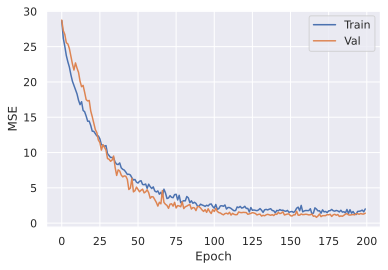

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

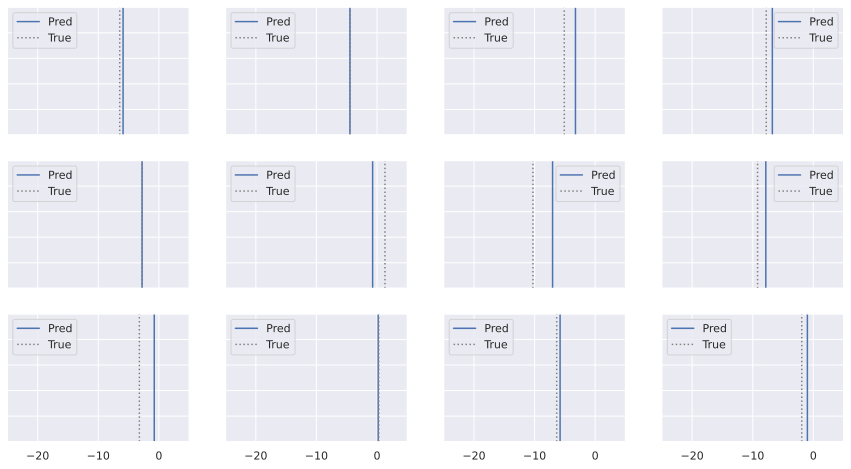

In [ ]:
# Make predictions (tautological)
preds = nn_model.predict(X_test)

# Plot true vs predicted durations
plt.figure(figsize=(15, 8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.axvline(preds[i], label='Pred')
    plt.axvline(y_test[i], ls=':', color='gray', label='True')
    plt.xlim([-25, 5])
    plt.legend()
    plt.gca().get_yaxis().set_ticklabels([])
    if i<8:
        plt.gca().get_xaxis().set_ticklabels([])

In [ ]:
print('MSE of calc:',mean_squared_error(y,calc_y))
print('MSE of pred:',mean_squared_error(y_test,preds))
print('MSE of validation:',history.history['val_loss'][199])
print('MSE of training:',history.history['loss'][199])

MSE of calc: 2.3762750607476635
MSE of pred: 1.2808478043571365
MSE of validation: 1.406345009803772
MSE of training: 2.0060415267944336


In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.tail()

,loss,val_loss
495,1.386840,2.983418
496,1.238532,3.000108
497,1.282991,2.909473
498,1.434403,3.072758
499,1.142624,2.934942


In [ ]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               153600    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
re_lu_4 (ReLU)               (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65536     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 128)              

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_r = pca.fit(X).transform(X)

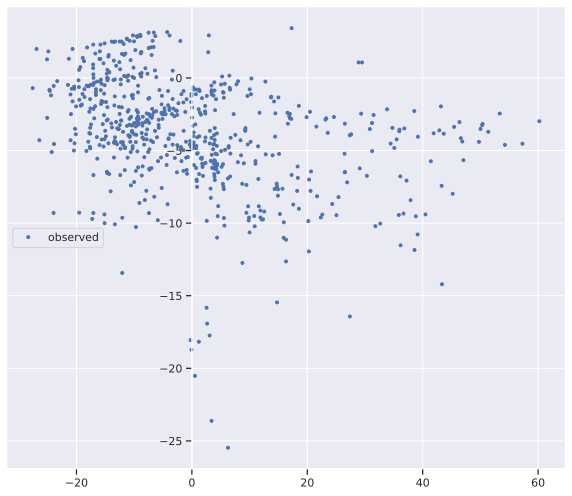

In [ ]:
plt.figure(figsize=[10, 8.5])
plt.plot(X_r, y, 'b.', label='observed');

ax = plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='center left', fancybox=True)